# Predict Stock Market with Machine Learning

## Install Dependencies

In [50]:
!pip install yfinance==0.2.54
!pip install matplotlib==3.10.1
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.1

## Import Dependencies

In [51]:
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score



In [52]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-13 00:00:00-04:00,5594.450195,5597.779785,5504.649902,5521.520020,5018980000,0.0,0.0
2025-03-14 00:00:00-04:00,5563.850098,5645.270020,5563.850098,5638.939941,4863180000,0.0,0.0
2025-03-17 00:00:00-04:00,5635.600098,5703.520020,5631.120117,5675.120117,5031770000,0.0,0.0


In [53]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-03-06 00:00:00-05:00', '2025-03-07 00:00:00-05:00',
               '2025-03-10 00:00:00-04:00', '2025-03-11 00:00:00-04:00',
               '2025-03-12 00:00:00-04:00', '2025-03-13 00:00:00-04:00',
               '2025-03-14 00:00:00-04:00', '2025-03-17 00:00:00-04:00',
               '2025-03-18 00:00:00-04:00', '2025-03-19 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24419, freq=None)

<Axes: xlabel='Date'>

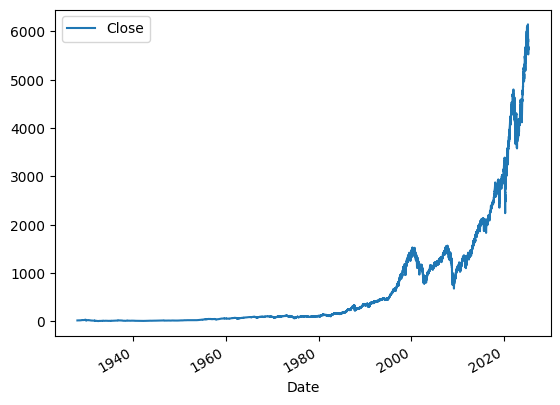

In [54]:
sp500.plot.line(y="Close", use_index=True)

## Data Pre-processing

In [ ]:
# removed because they are needed for individual stocks not index
del sp500["Dividends"]
del sp500["Stock Splits"]

In [56]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [57]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-03-13 00:00:00-04:00,5594.450195,5597.779785,5504.649902,5521.520020,5018980000,5638.939941
2025-03-14 00:00:00-04:00,5563.850098,5645.270020,5563.850098,5638.939941,4863180000,5675.120117
2025-03-17 00:00:00-04:00,5635.600098,5703.520020,5631.120117,5675.120117,5031770000,5614.660156


In [ ]:
# Note: I am trying to predict if the prices will go up or down not the actual prices
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [ ]:
# Just using the recent years
sp500 = sp500.loc["1990-01-01":].copy()

In [60]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-03-13 00:00:00-04:00,5594.450195,5597.779785,5504.649902,5521.520020,5018980000,5638.939941,1
2025-03-14 00:00:00-04:00,5563.850098,5645.270020,5563.850098,5638.939941,4863180000,5675.120117,1
2025-03-17 00:00:00-04:00,5635.600098,5703.520020,5631.120117,5675.120117,5031770000,5614.660156,0


## Training the Model

In [61]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [62]:
preds = model.predict(test[predictors])

In [63]:
preds = pd.Series(preds, index = test.index)

In [64]:
precision_score(test["Target"], preds)

0.6

In [65]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

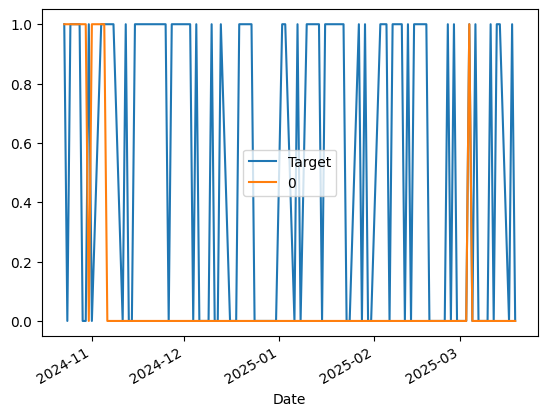

In [66]:
combined.plot()

## Adding Back Testing System to the Model

In [67]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [ ]:
# First model is trained on 2500 days or roughly 10 years of data and predict (10+1)th year and so on
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test=data.iloc[i:(step+i)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
        

In [69]:
predictions = backtest(sp500, model, predictors)

In [70]:
predictions["Predictions"].value_counts()

Predictions
0    3730
1    2639
Name: count, dtype: int64

In [71]:
precision_score(predictions["Target"], predictions["Predictions"])

0.52860932171277

In [72]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535877
0    0.464123
Name: count, dtype: float64

## Adding more Predictors

In [ ]:
horizons = [2,5,60,250,1000] # check the change in price between today and horizon days to see if it is due for going down
new_predictors = []
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]

In [ ]:
sp500 = sp500.dropna() #remove the ones that it can't compare with because no days there

In [75]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-12 00:00:00-04:00,5624.839844,5642.189941,5546.089844,5599.299805,5219830000,5521.520020,0,1.002437,1.0,0.989463,2.0,0.938958,29.0,0.995717,140.0,1.210871,527.0
2025-03-13 00:00:00-04:00,5594.450195,5597.779785,5504.649902,5521.520020,5018980000,5638.939941,1,0.993006,1.0,0.983259,2.0,0.927288,29.0,0.981637,140.0,1.193636,527.0
2025-03-14 00:00:00-04:00,5563.850098,5645.270020,5563.850098,5638.939941,4863180000,5675.120117,1,1.010521,1.0,1.008885,2.0,0.948101,30.0,1.002164,141.0,1.218572,527.0


In [76]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
# Reduce trade frequency while increasing profit
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] #probability of stock price going up
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [78]:
predictions = backtest(sp500, model, new_predictors)

In [79]:
predictions["Predictions"].value_counts()

Predictions
0.0    4502
1.0     866
Name: count, dtype: int64

In [80]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5715935334872979